**Image** **preprocessing**

In [88]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2,horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1)

In [89]:
x_train = train_datagen.flow_from_directory(r'C:\Users\chana\OneDrive\Desktop\IBM Project folder\Dataset Plant Disease\Veg-dataset\Veg-dataset\train_set',target_size = (128,128),batch_size = 32,class_mode = 'categorical')
x_test = test_datagen.flow_from_directory(r'C:\Users\chana\OneDrive\Desktop\IBM Project folder\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set',target_size = (128,128),batch_size = 32,class_mode = 'categorical')

Found 11386 images belonging to 9 classes.
Found 3416 images belonging to 9 classes.


**Importing** **Libraries**

In [90]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten

**Initializing** **Model**

In [91]:
model = Sequential()

**Adding** **CNN** **layers**

Convolution Layer

In [92]:
model.add(Convolution2D(32,(3,3),input_shape = (128,128,3),activation = 'relu'))

Pooling Layer

In [93]:
model.add(MaxPooling2D(pool_size = (2,2)))

Flatten Layer

In [94]:
model.add(Flatten())

Adding Dense Layer

In [95]:
model.add(Dense(40,kernel_initializer='uniform', activation = 'relu'))
model.add(Dense(20,kernel_initializer = 'random_uniform', activation = 'relu'))
model.add(Dense(9,kernel_initializer = 'random_uniform', activation = 'softmax'))

In [96]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 127008)            0         
                                                                 
 dense_12 (Dense)            (None, 40)                5080360   
                                                                 
 dense_13 (Dense)            (None, 20)                820       
                                                                 
 dense_14 (Dense)            (None, 9)                 189       
                                                      

**Train** **and** **Save** **the** **Model**

In [97]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=["accuracy"])
len(x_train)

356

In [98]:
model.fit(x_train,steps_per_epoch= 89,epochs=1,validation_data=x_test,validation_steps= 27)

89/89 [==============================] - 48s 528ms/step - loss: 2.0374 - accuracy: 0.2238 - val_loss: 113.8208 - val_accuracy: 0.2986


In [99]:
train_loss,train_acc = model.evaluate(x_train,steps = 16)
validation_loss,test_acc = model.evaluate(x_test,steps = 16)

16/16 [==============================] - 3s 163ms/step - loss: 121.9902 - accuracy: 0.3047


In [100]:
print('Train:%.3f,Test:%.3f'%(train_acc,test_acc))

Train:0.295,Test:0.305


In [101]:
model.save('vegetable.h5')

In [102]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [103]:
model=load_model('vegetable.h5')

In [104]:
img=image.load_img(r'C:\Users\chana\OneDrive\Desktop\IBM Project folder\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___healthy\b45d62a2-3de1-411b-8f88-ab52195b6dda___JR_HL 7639.JPG')

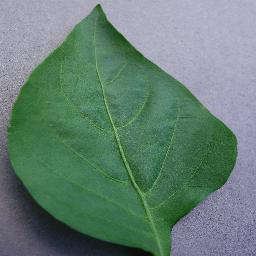

In [105]:
img

In [106]:
img=image.load_img(r'C:\Users\chana\OneDrive\Desktop\IBM Project folder\Dataset Plant Disease\Veg-dataset\Veg-dataset\test_set\Pepper,_bell___healthy\b2045348-8e3f-408f-89c0-5546d59a3f9a___JR_HL 8370.JPG',target_size = (128,128))

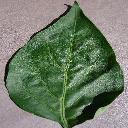

In [107]:
img

In [108]:
x = image.img_to_array(img)

In [109]:
x

array([[[157., 141., 142.],
        [164., 148., 149.],
        [158., 142., 143.],
        ...,
        [158., 143., 146.],
        [150., 135., 138.],
        [159., 144., 147.]],

       [[159., 143., 144.],
        [162., 146., 147.],
        [162., 146., 147.],
        ...,
        [153., 138., 141.],
        [177., 162., 165.],
        [157., 142., 145.]],

       [[157., 141., 142.],
        [169., 153., 154.],
        [158., 142., 143.],
        ...,
        [157., 142., 145.],
        [166., 151., 154.],
        [162., 147., 150.]],

       ...,

       [[153., 142., 148.],
        [158., 147., 153.],
        [159., 148., 154.],
        ...,
        [177., 170., 178.],
        [180., 173., 181.],
        [163., 156., 164.]],

       [[158., 147., 153.],
        [155., 144., 150.],
        [159., 148., 154.],
        ...,
        [189., 182., 190.],
        [168., 161., 169.],
        [187., 180., 188.]],

       [[161., 150., 156.],
        [160., 149., 155.],
        [153., 1

In [110]:
x = np.expand_dims(x,axis=0)

In [111]:
x

array([[[[157., 141., 142.],
         [164., 148., 149.],
         [158., 142., 143.],
         ...,
         [158., 143., 146.],
         [150., 135., 138.],
         [159., 144., 147.]],

        [[159., 143., 144.],
         [162., 146., 147.],
         [162., 146., 147.],
         ...,
         [153., 138., 141.],
         [177., 162., 165.],
         [157., 142., 145.]],

        [[157., 141., 142.],
         [169., 153., 154.],
         [158., 142., 143.],
         ...,
         [157., 142., 145.],
         [166., 151., 154.],
         [162., 147., 150.]],

        ...,

        [[153., 142., 148.],
         [158., 147., 153.],
         [159., 148., 154.],
         ...,
         [177., 170., 178.],
         [180., 173., 181.],
         [163., 156., 164.]],

        [[158., 147., 153.],
         [155., 144., 150.],
         [159., 148., 154.],
         ...,
         [189., 182., 190.],
         [168., 161., 169.],
         [187., 180., 188.]],

        [[161., 150., 156.],
       